In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import math
from math import exp
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def rfr(X_norm, y):
  best_model_rs = -1
  best_rmse = np.inf

  for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=45)
    rfr = RandomForestRegressor(n_estimators=250, max_depth=3, criterion='friedman_mse', max_features="sqrt", random_state=i)
    cv_scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_model_rs = i
      best_rmse = avg_rmse

  cv_rmse=best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=45)
  rfr = RandomForestRegressor(n_estimators=250, max_depth=3, criterion='friedman_mse', max_features="sqrt", random_state=best_model_rs)
  rfr.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = rfr.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = rfr.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Model random state:", best_model_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('Random Forest Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight="bold")
  plt.yticks(fontsize=12, fontweight="bold")
  plt.gca().grid(False)
  plt.legend()
  plt.show()

  return rfr, test_r2

In [ ]:
def xgboost(X_norm, y):
  best_model_rs = -1
  best_rmse = np.inf

  for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=50)
    xgb_r = xg.XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.01, subsample= 1.0, reg_alpha=0.7, reg_lambda=0.5, seed =i)
    cv_scores = cross_val_score(xgb_r, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_model_rs = i
      best_rmse = avg_rmse

  cv_rmse = best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=50)
  xgb_r = xg.XGBRegressor(n_estimators=500, max_depth=8, learning_rate=0.01, subsample= 1.0, reg_alpha=0.7, reg_lambda=0.5, seed=best_model_rs)
  xgb_r.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = xgb_r.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = xgb_r.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Model random state:", best_model_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('XGBoost Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight="bold")
  plt.yticks(fontsize=12, fontweight="bold")
  plt.legend()
  plt.gca().grid(False)
  plt.show()

  return xgb_r, test_r2

In [ ]:
def dtr(X_norm, y):
  best_model_rs = -1
  best_rmse = np.inf

  for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=50)
    dtr=DecisionTreeRegressor(max_depth=4, min_samples_split=3, min_samples_leaf=1, max_features='auto', random_state=i)
    cv_scores = cross_val_score(dtr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_model_rs = i
      best_rmse = avg_rmse

  cv_rmse = best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=50)
  dtr=DecisionTreeRegressor(max_depth=4, min_samples_split=3, min_samples_leaf=1, max_features='auto', random_state=best_model_rs)
  dtr.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = dtr.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = dtr.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Model random state:", best_model_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('Decision Tree Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight='bold')
  plt.yticks(fontsize=12, fontweight='bold')
  plt.legend()
  plt.gca().grid(False)
  plt.show()

  return dtr, test_r2

In [ ]:
def svr(X_norm, y):
  best_rs = -1
  best_rmse = np.inf

  for i in range(1, 201):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=i)
    svr = SVR(kernel='poly',gamma='scale', C=10, epsilon=1, degree=1)
    cv_scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_rs = i
      best_rmse = avg_rmse

  cv_rmse = best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=best_rs)
  svr = SVR(kernel='poly',gamma='scale', C=10, epsilon=1, degree=1)
  svr.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = svr.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = svr.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Random state:", best_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('Support Vector Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight="bold")
  plt.yticks(fontsize=12, fontweight="bold")
  plt.legend()
  plt.gca().grid(False)
  plt.show()

  return svr, test_r2

In [ ]:
def enr(X_norm, y):
  best_rs = -1
  best_rmse = np.inf

  for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=i)
    elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.0)
    cv_scores = cross_val_score(elastic_net_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    avg_rmse = np.mean(cv_rmse_scores)

    if avg_rmse < best_rmse:
      best_rs = i
      best_rmse = avg_rmse

  cv_rmse = best_rmse

  X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=best_rs)
  elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.0)
  elastic_net_model.fit(X_train, y_train)

  # Predictions on train set
  y_train_pred = elastic_net_model.predict(X_train)
  train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
  train_r2 = r2_score(y_train, y_train_pred)

  # Predictions on test set
  y_test_pred = elastic_net_model.predict(X_test)
  test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
  test_r2 = r2_score(y_test, y_test_pred)

  print("Cross Validation RMSE: ", cv_rmse)
  print("Random state:", best_rs)
  print("Training set RMSE: ", train_rmse)
  print("Training set R2 Score: ", train_r2)
  print("Test RMSE: ", test_rmse)
  print("Test R2 Score: ", test_r2)

  xPlot = y_train
  yPlot = y_train_pred
  x1Plot = y_test
  y1Plot = y_test_pred
  fig = plt.figure(figsize=(6, 6), dpi=300)
  plt.scatter(xPlot, yPlot, color='red', label='Train Data')
  plt.plot(xPlot, xPlot, linestyle='--', color='black', label='y = x')
  plt.scatter(x1Plot, y1Plot, color='blue', label='Test Data')
  plt.xlabel('True ΔΔG', fontweight='bold', fontsize=14)
  plt.ylabel('Predicted ΔΔG', fontweight='bold', fontsize=14)
  plt.title('Elastic Net Regression', fontweight='bold', fontsize=16)
  plt.xticks(fontsize=12, fontweight="bold")
  plt.yticks(fontsize=12, fontweight="bold")
  plt.legend()
  plt.gca().grid(False)
  plt.show()

  return enr, test_r2

In [ ]:
data = pd.read_excel("/content/dataset.xlsx")
data.head()

,ID,Reaction,%ee,ddG_exp_value,d.BL1,d.BL2,d.BL3,d.BL4,d.D1,d.D2,...,CPA_B5(Bmax),CPA_L,d(BE),Traceless_QM,A.Nitroso,A.Indole,A.CPA,V.Nitroso,V.Indole,V.CPA
0,R0004,aa1,64,0.909808,0.78279,0.01504,0.00500,0.57663,-176.61232,23.52332,...,3.27,8.5,0.005408,-5.3209,168.272,211.301,538.661,137.47,168.718,466.146
1,R0005,aa2,86,1.552014,0.81500,0.04768,0.08226,-0.19524,-172.79376,23.72889,...,7.04,8.2,0.006525,-8.1108,168.272,211.301,791.973,137.47,168.718,694.528
2,R0006,aa3,87,1.599696,-0.05567,0.01224,0.06187,-1.57136,-177.04393,0.61468,...,5.69,6.6,0.009486,-7.5545,168.272,211.301,566.192,137.47,168.718,503.718
3,R0007,aa4,96,2.335092,0.76173,0.04037,0.06304,-1.52496,-171.20815,2.32143,...,5.69,6.5,0.007321,-10.4128,168.272,211.301,654.560,137.47,168.718,588.947
4,R0008,aa5,96,2.335092,1.65383,0.03142,0.00520,0.00633,-178.71876,8.31042,...,5.71,8.5,0.006261,-10.4281,168.272,211.301,655.490,137.47,168.718,588.843


In [ ]:
data1 = data.drop(['ID', 'Reaction','%ee'], axis=1)
data2 = data1.dropna()

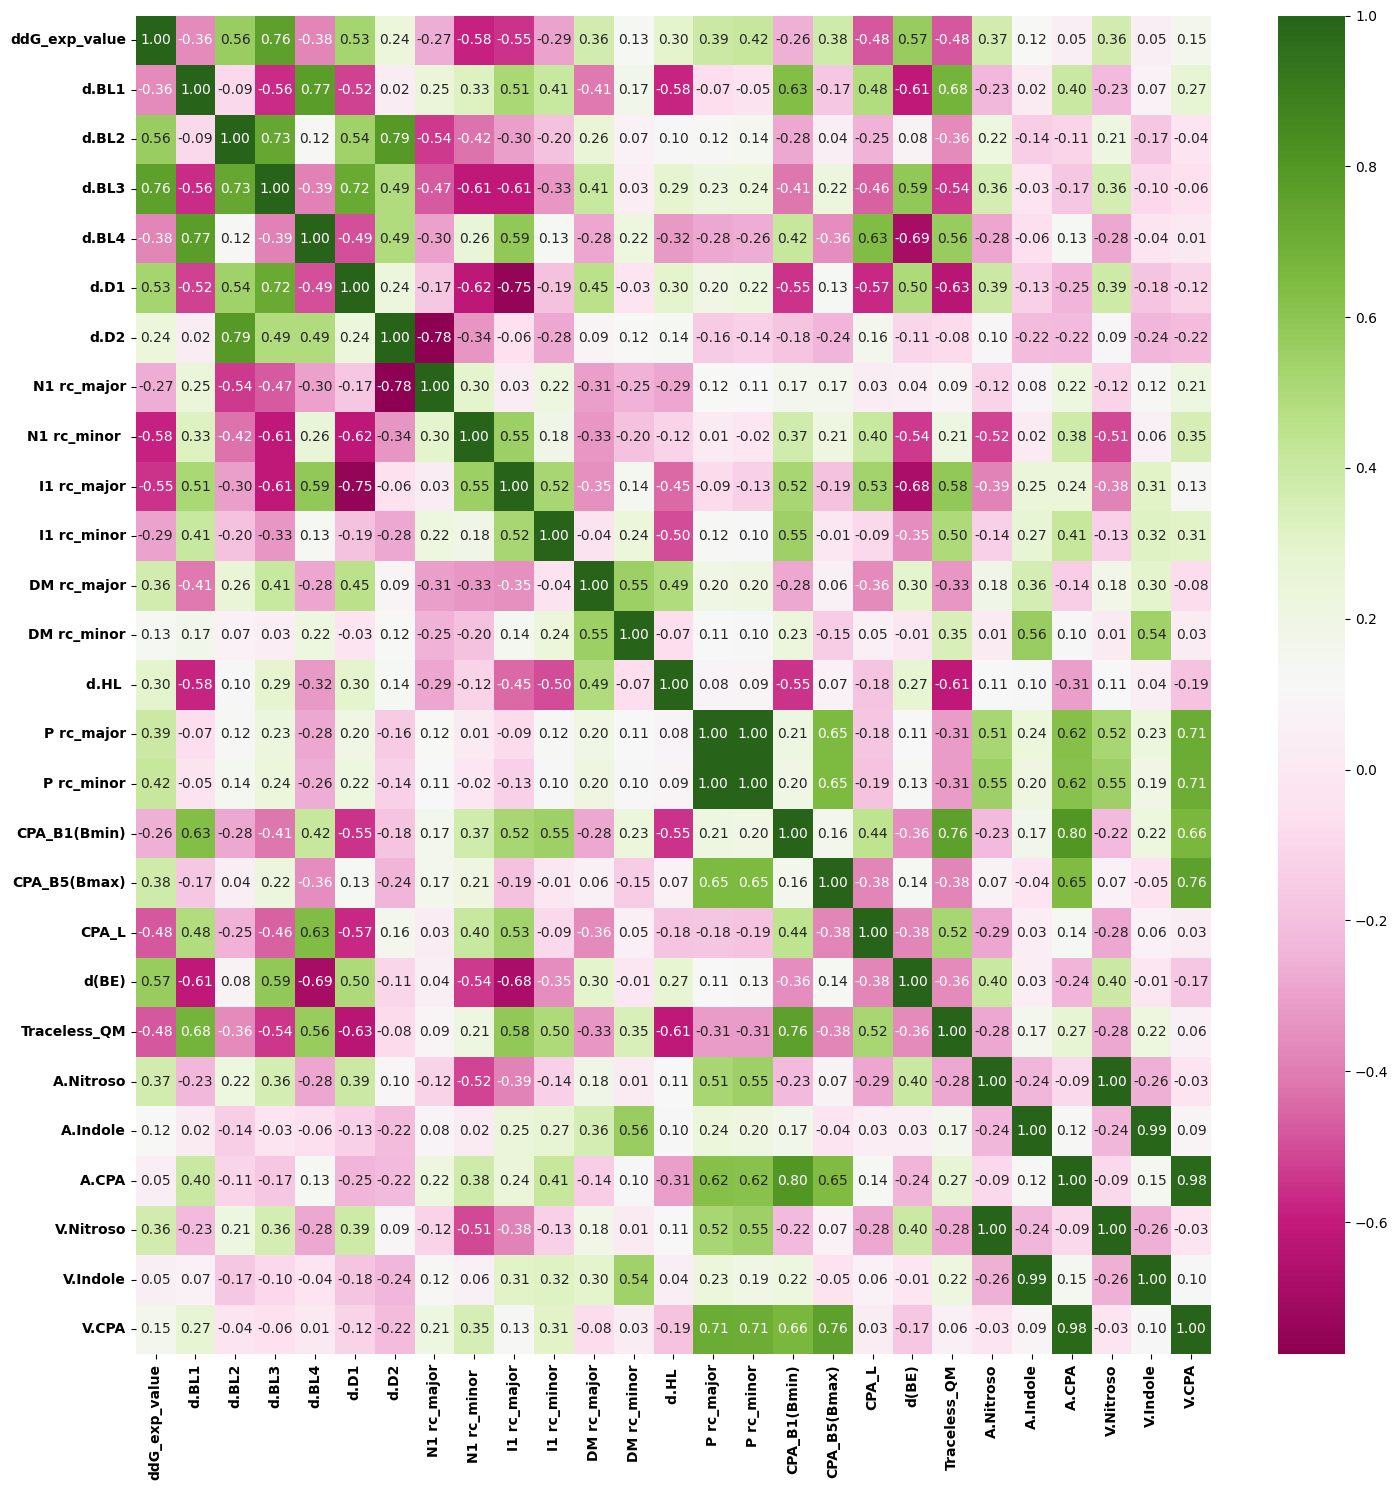

In [ ]:
plt.figure(figsize=(15, 15))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='PiYG', fmt=".2f", linewidths=0.0)
plt.xticks(rotation=90, fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')
plt.tight_layout()
plt.show()

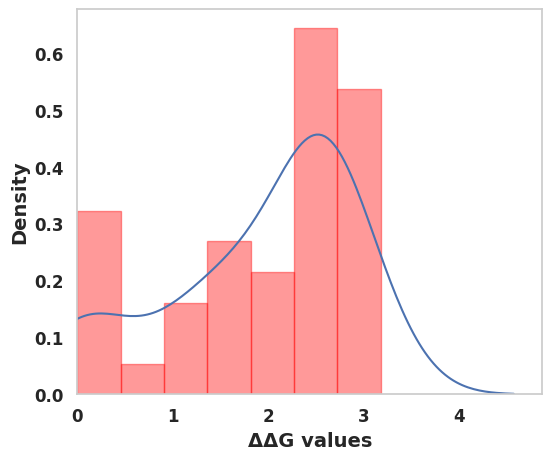

Number of values between 0-1: 8
Number of values between 1-2: 9
Number of values between 2-3: 21
Number of values between 3-4: 3
Peak value of the distribution: 2.5107548640419264


In [ ]:
plt.figure(figsize=(6, 5))
sns.set(style="whitegrid")
plot_color='red'
sns.distplot(data2.ddG_exp_value, bins=7, kde=True, hist_kws={"edgecolor": plot_color, "color":plot_color})
plt.xlabel("ΔΔG values", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.gca().grid(False)
plt.xlim(0)
plt.show()

ranges = [(0, 1), (1, 2), (2, 3), (3, 4)]
for start, end in ranges:
    count = ((data2.ddG_exp_value >= start) & (data2.ddG_exp_value < end)).sum()
    print(f"Number of values between {start}-{end}: {count}")

mode_result = stats.mode(data2.ddG_exp_value)
peak_value = mode_result.mode
print(f"Peak value of the distribution: {peak_value}")

In [ ]:
target_cor = cor['ddG_exp_value']
less_correlated_features = target_cor[abs(target_cor)<0.15].index
data2 = data2.drop(less_correlated_features, axis=1)

In [ ]:
X = data2.drop("ddG_exp_value", axis=1)
y = data2[['ddG_exp_value']]

In [ ]:
ext_testset1 = pd.read_excel("/content/ext_testset_1.xlsx")
ext_testset1 = ext_testset1.drop(['ID', 'Reaction','%ee'], axis=1)
ext_testset1  = ext_testset1 .drop(['DM rc_minor', 'A.Indole', 'A.CPA', 'V.Indole'], axis=1)
ext_testset1 = ext_testset1.dropna(axis=1)

In [ ]:
ext_test2 = pd.read_excel("/content/ext_testset_2.xlsx")
ext_test2 = ext_test2.drop(['ID', 'Reaction','%ee'], axis=1)
ext_test2 = ext_test2.drop(['DM rc_minor', 'A.Indole', 'A.CPA', 'V.Indole'], axis=1)
ext_test2 = ext_test2.dropna()

In [ ]:
ext_X2 = ext_test2.drop("ddG_exp_value", axis=1)
ext_y2 = ext_test2[['ddG_exp_value']]

**Normalization**

In [ ]:
combined_data = np.vstack((X, ext_testset1,ext_X2))
scaler = MinMaxScaler()
scaler.fit(combined_data)

MinMaxScaler()

In [ ]:
X_norm = scaler.transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.head()

,d.BL1,d.BL2,d.BL3,d.BL4,d.D1,d.D2,N1 rc_major,N1 rc_minor,I1 rc_major,I1 rc_minor,...,P rc_major,P rc_minor,CPA_B1(Bmin),CPA_B5(Bmax),CPA_L,d(BE),Traceless_QM,A.Nitroso,V.Nitroso,V.CPA
0,0.465202,0.328003,0.361848,0.838985,0.334469,0.743927,0.108108,0.178571,0.421053,0.411765,...,0.196580,0.218981,0.025157,0.000000,0.476744,0.999997,0.510762,0.0,0.0,0.214384
1,0.469691,0.732614,0.885964,0.723256,0.762383,0.747251,0.459459,0.535714,0.421053,0.607843,...,0.852620,0.847652,0.452830,1.000000,0.406977,0.999997,0.279619,0.0,0.0,0.998119
2,0.348363,0.293294,0.747643,0.516931,0.286102,0.373443,0.810811,0.178571,0.473684,0.588235,...,0.332248,0.335888,0.006289,0.641910,0.034884,0.999998,0.325708,0.0,0.0,0.343320
3,0.462267,0.641998,0.755580,0.523888,0.940069,0.401045,0.864865,0.285714,0.078947,0.588235,...,0.605455,0.615130,0.012579,0.641910,0.011628,0.999997,0.088898,0.0,0.0,0.635799
4,0.586582,0.531052,0.363205,0.753478,0.098417,0.497900,0.972973,0.428571,0.447368,0.313725,...,0.601425,0.609676,0.025157,0.647215,0.476744,0.999997,0.087630,0.0,0.0,0.635442


Cross Validation RMSE:  0.6739432292968528
Model random state: 28
Training set RMSE:  0.35726682757712325
Training set R2 Score:  0.8769893840267134
Test RMSE:  0.31804142166075944
Test R2 Score:  0.8542931115314171


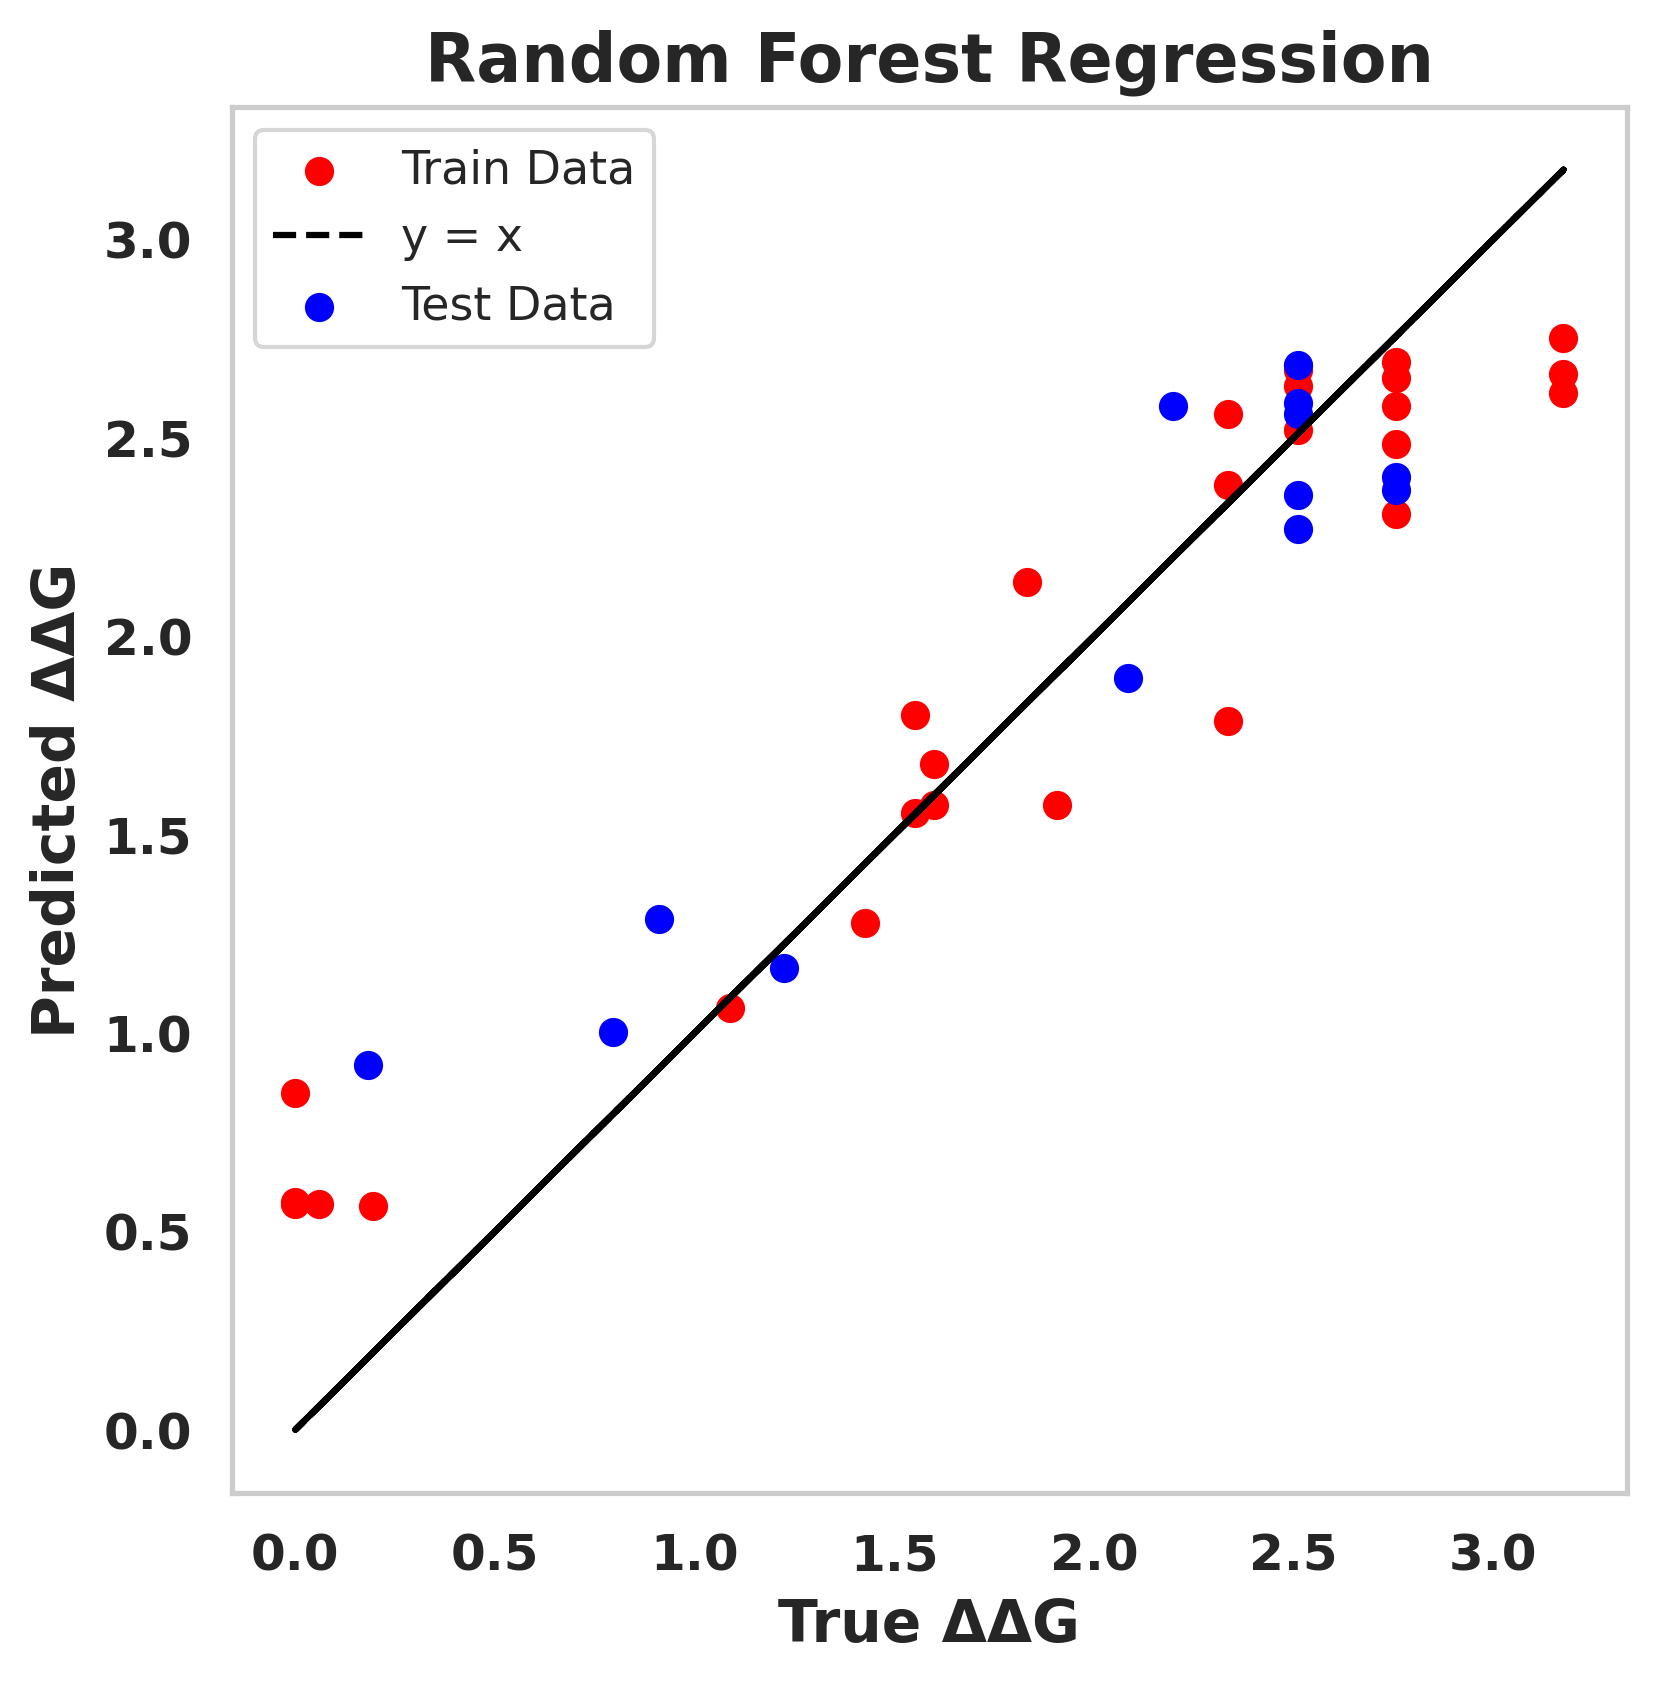

Cross Validation RMSE:  0.5643743812746463
Model random state: 1
Training set RMSE:  0.14732596486100133
Training set R2 Score:  0.9753264422261261
Test RMSE:  0.4868985024549236
Test R2 Score:  0.7656878429603753


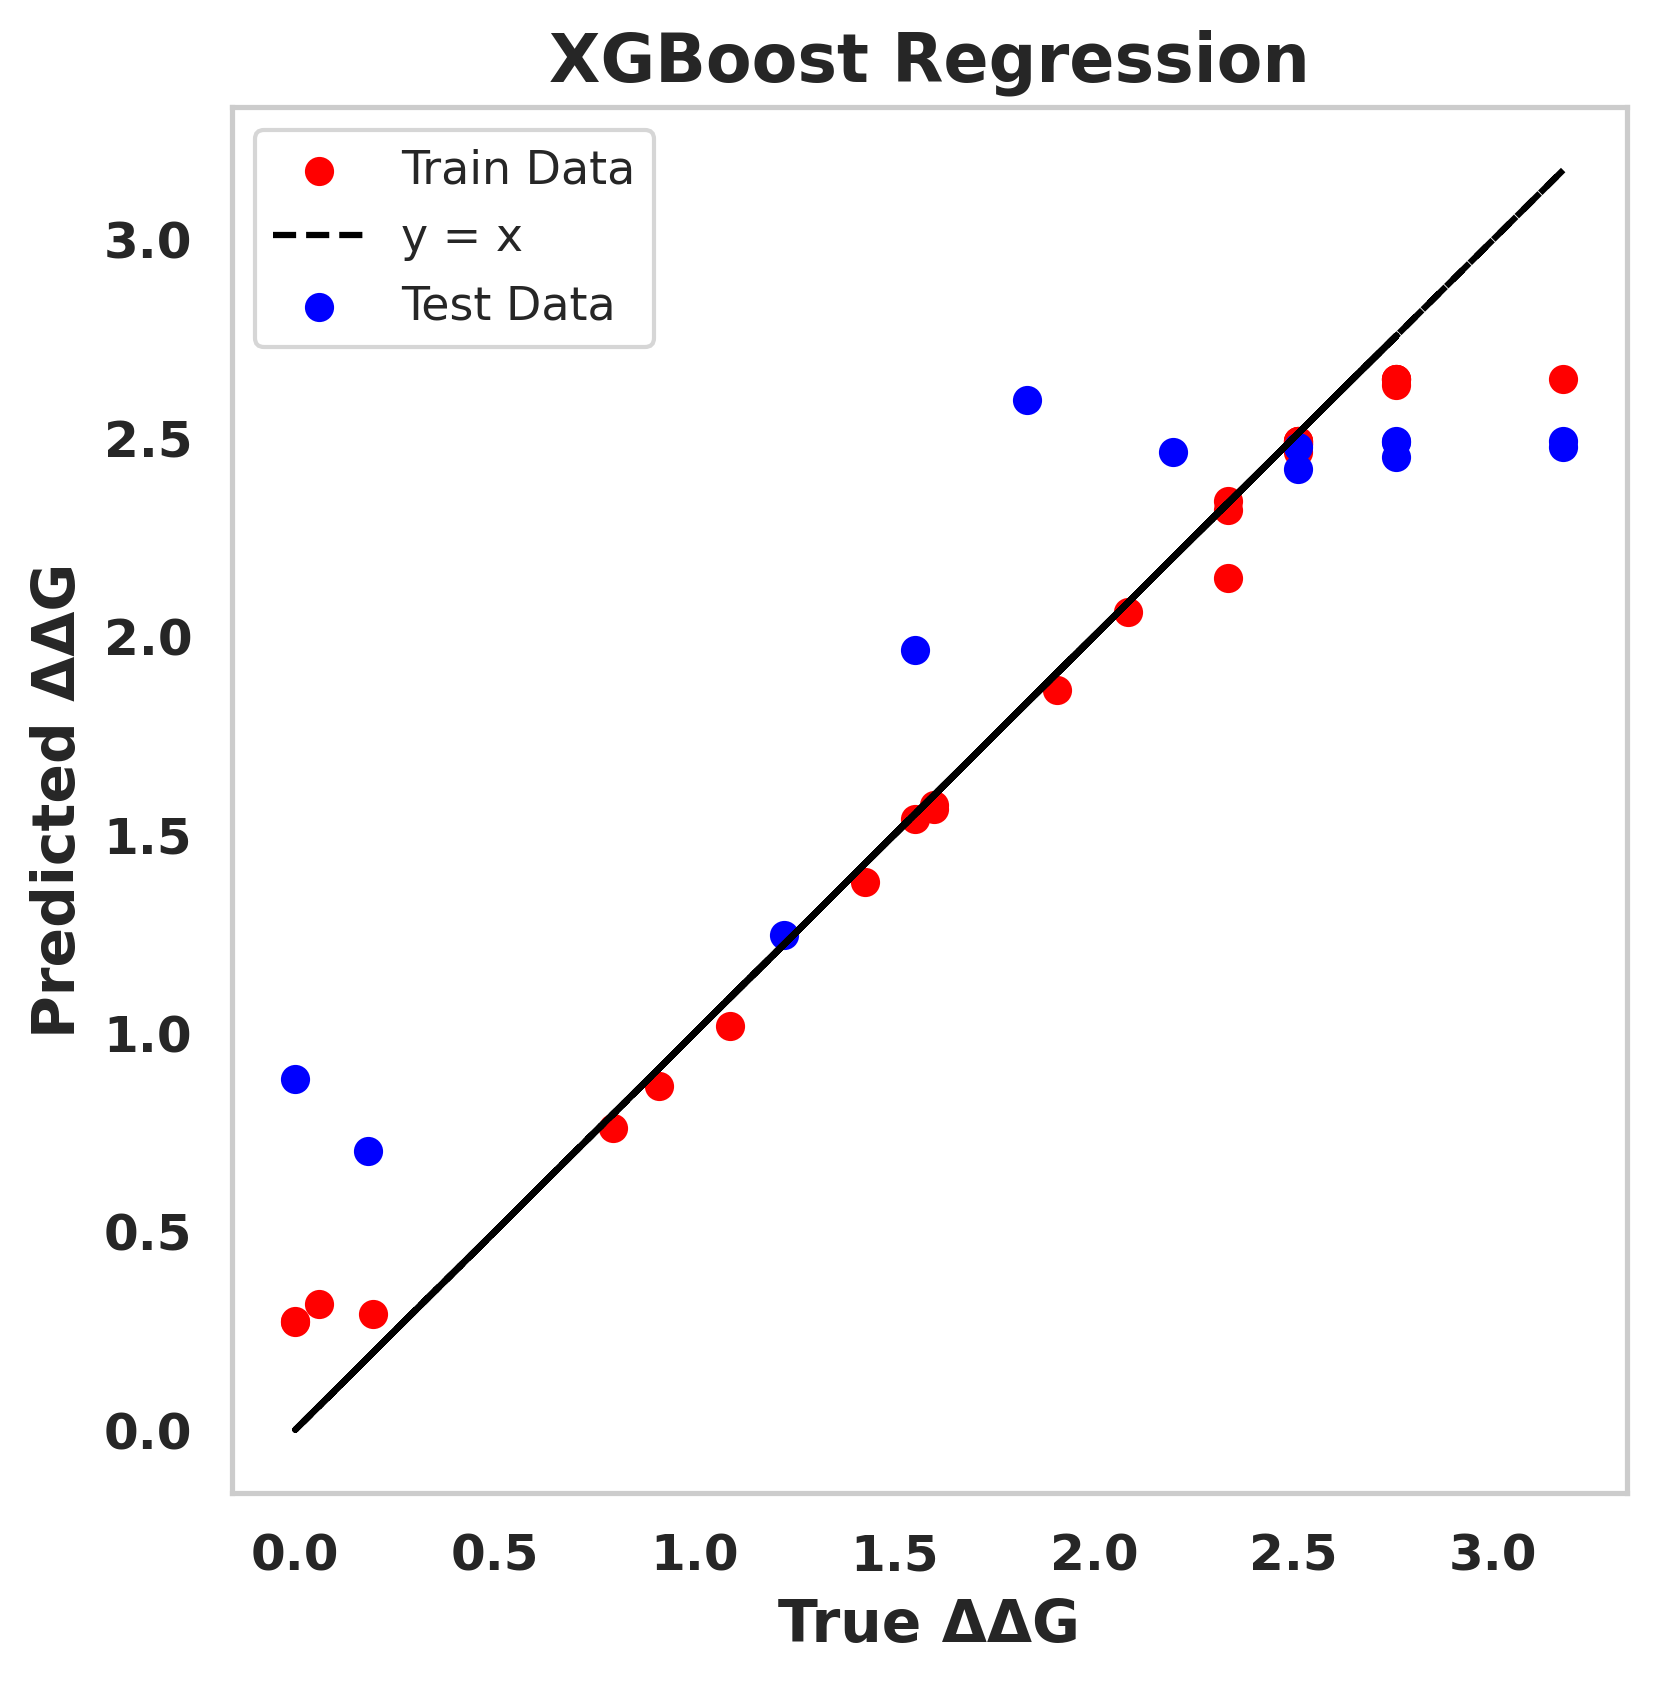

Cross Validation RMSE:  0.6112493035516322
Model random state: 45
Training set RMSE:  0.13562332813587538
Training set R2 Score:  0.9790905801251876
Test RMSE:  0.4748557896541954
Test R2 Score:  0.7771352310598452


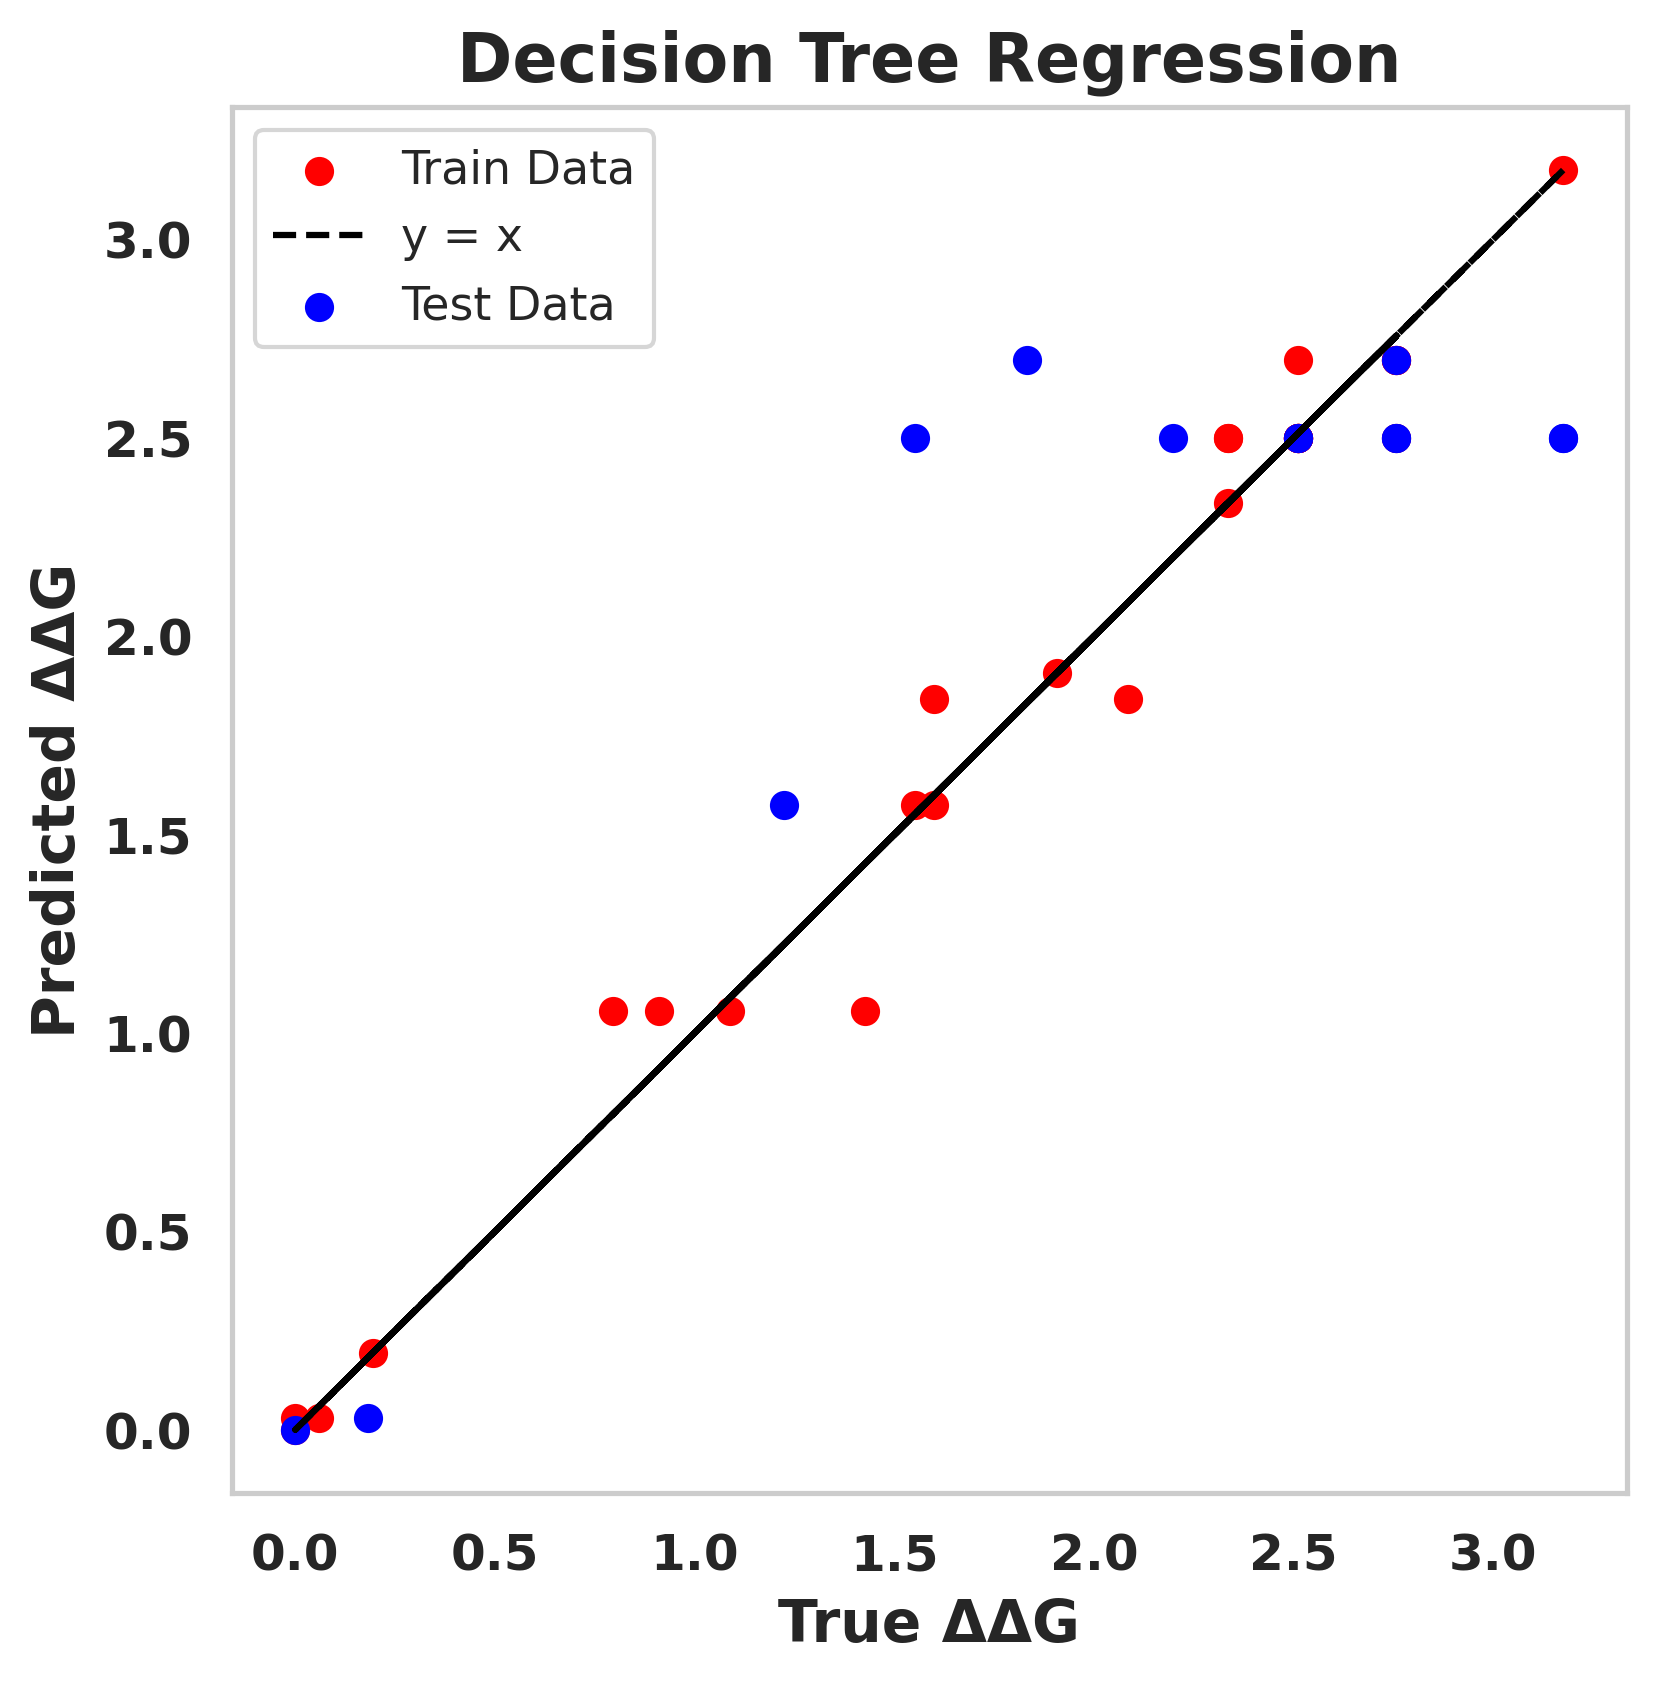

Cross Validation RMSE:  0.5389656571828227
Random state: 117
Training set RMSE:  0.5502254254926916
Training set R2 Score:  0.48205582351201925
Test RMSE:  1.0313724920592968
Test R2 Score:  0.2852941059841896


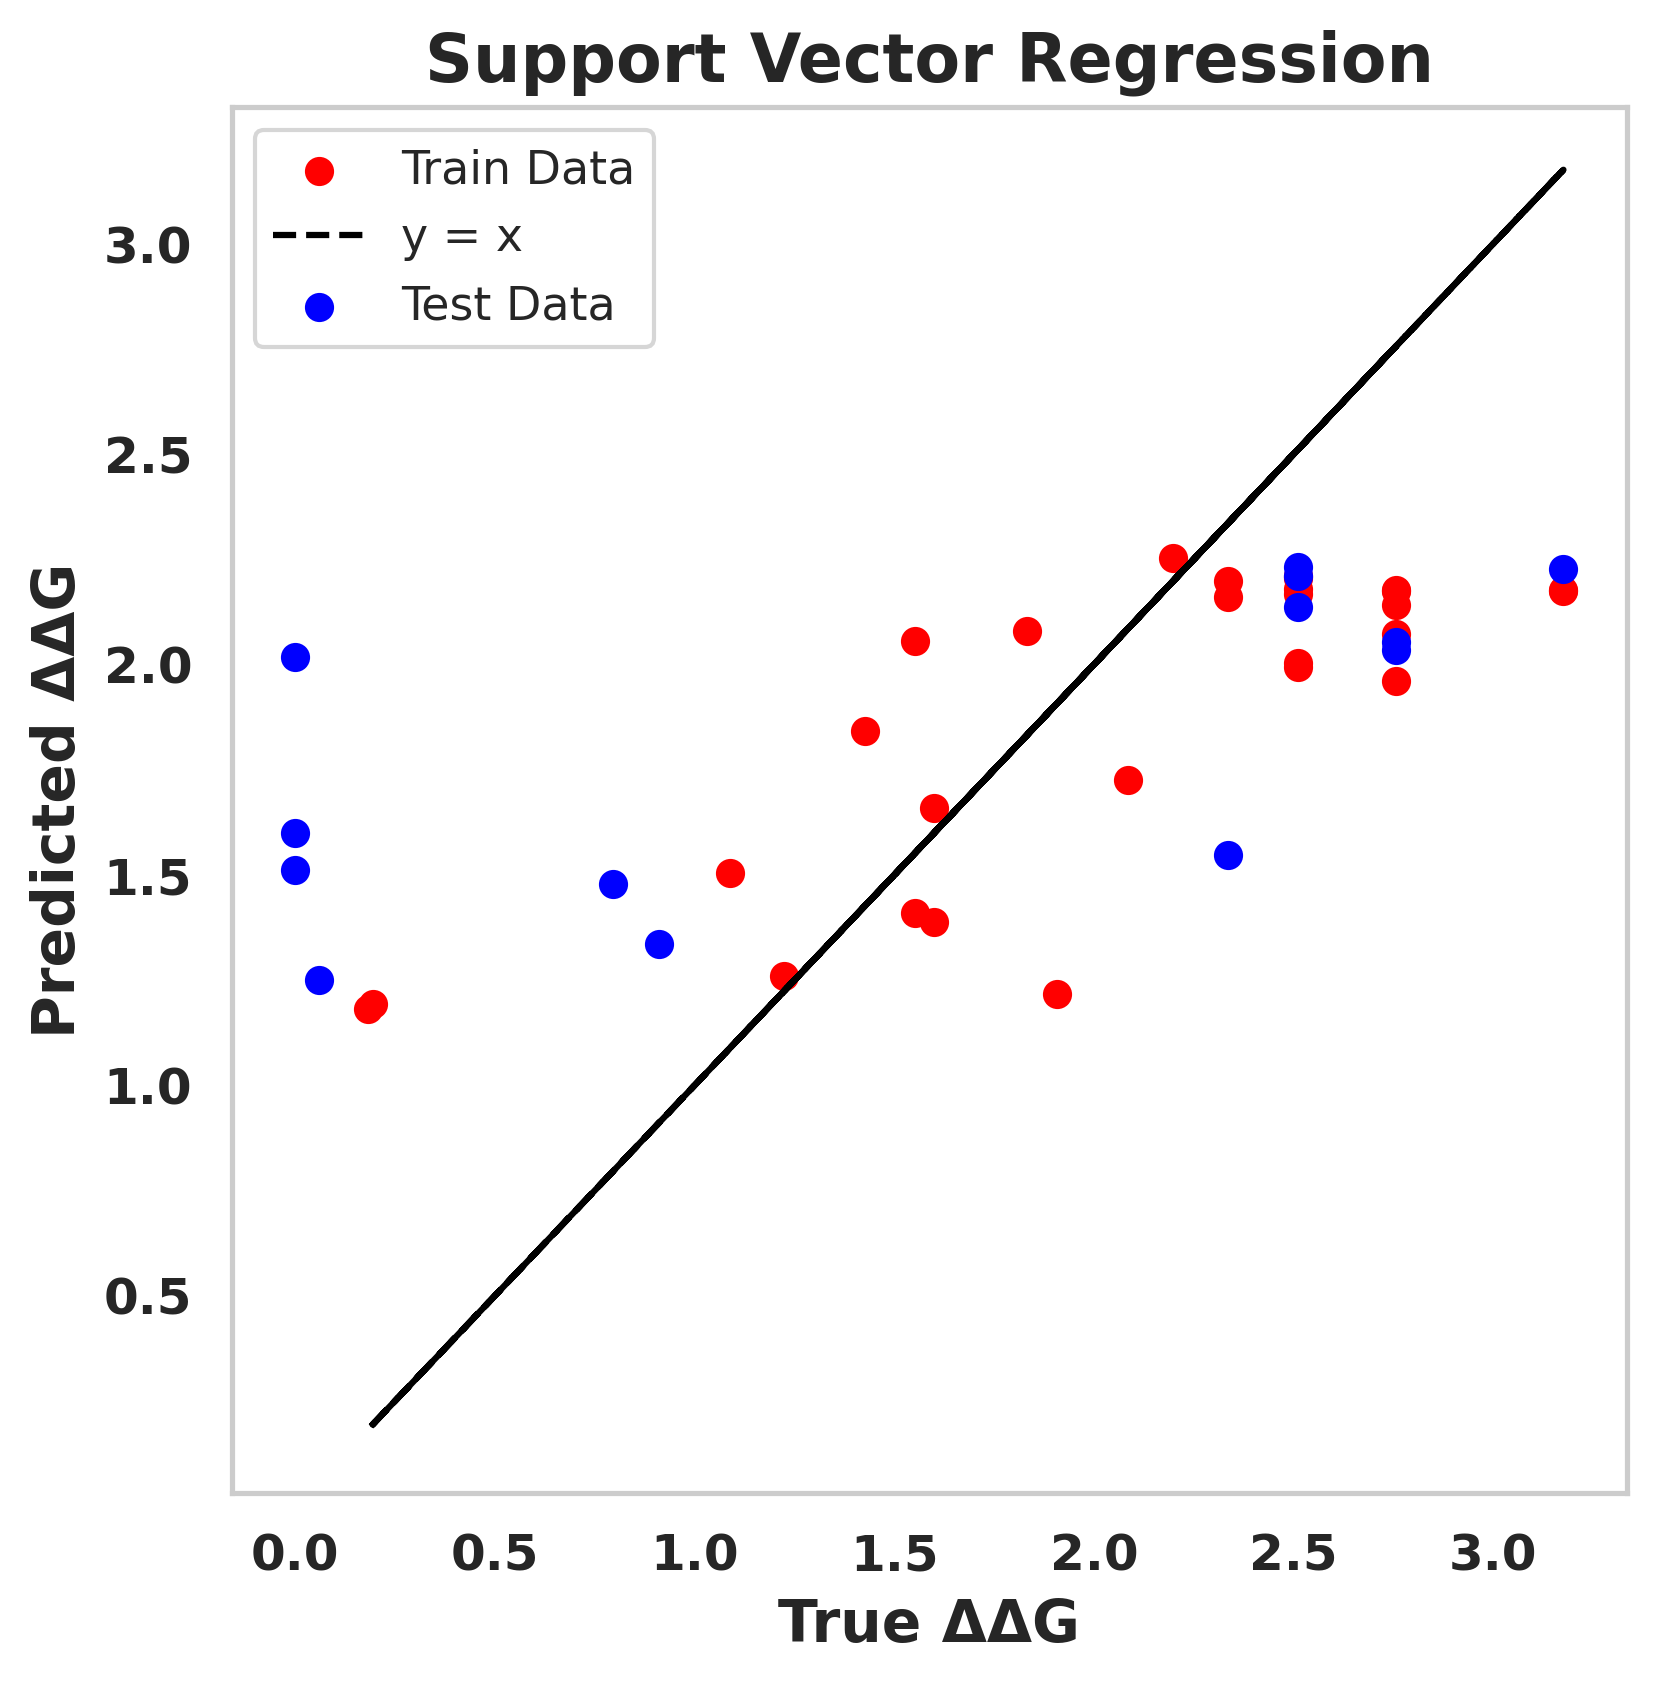

Cross Validation RMSE:  0.4983448828575451
Random state: 54
Training set RMSE:  0.45151090964222007
Training set R2 Score:  0.5720951076715206
Test RMSE:  1.1393164295004286
Test R2 Score:  0.1988471963692029


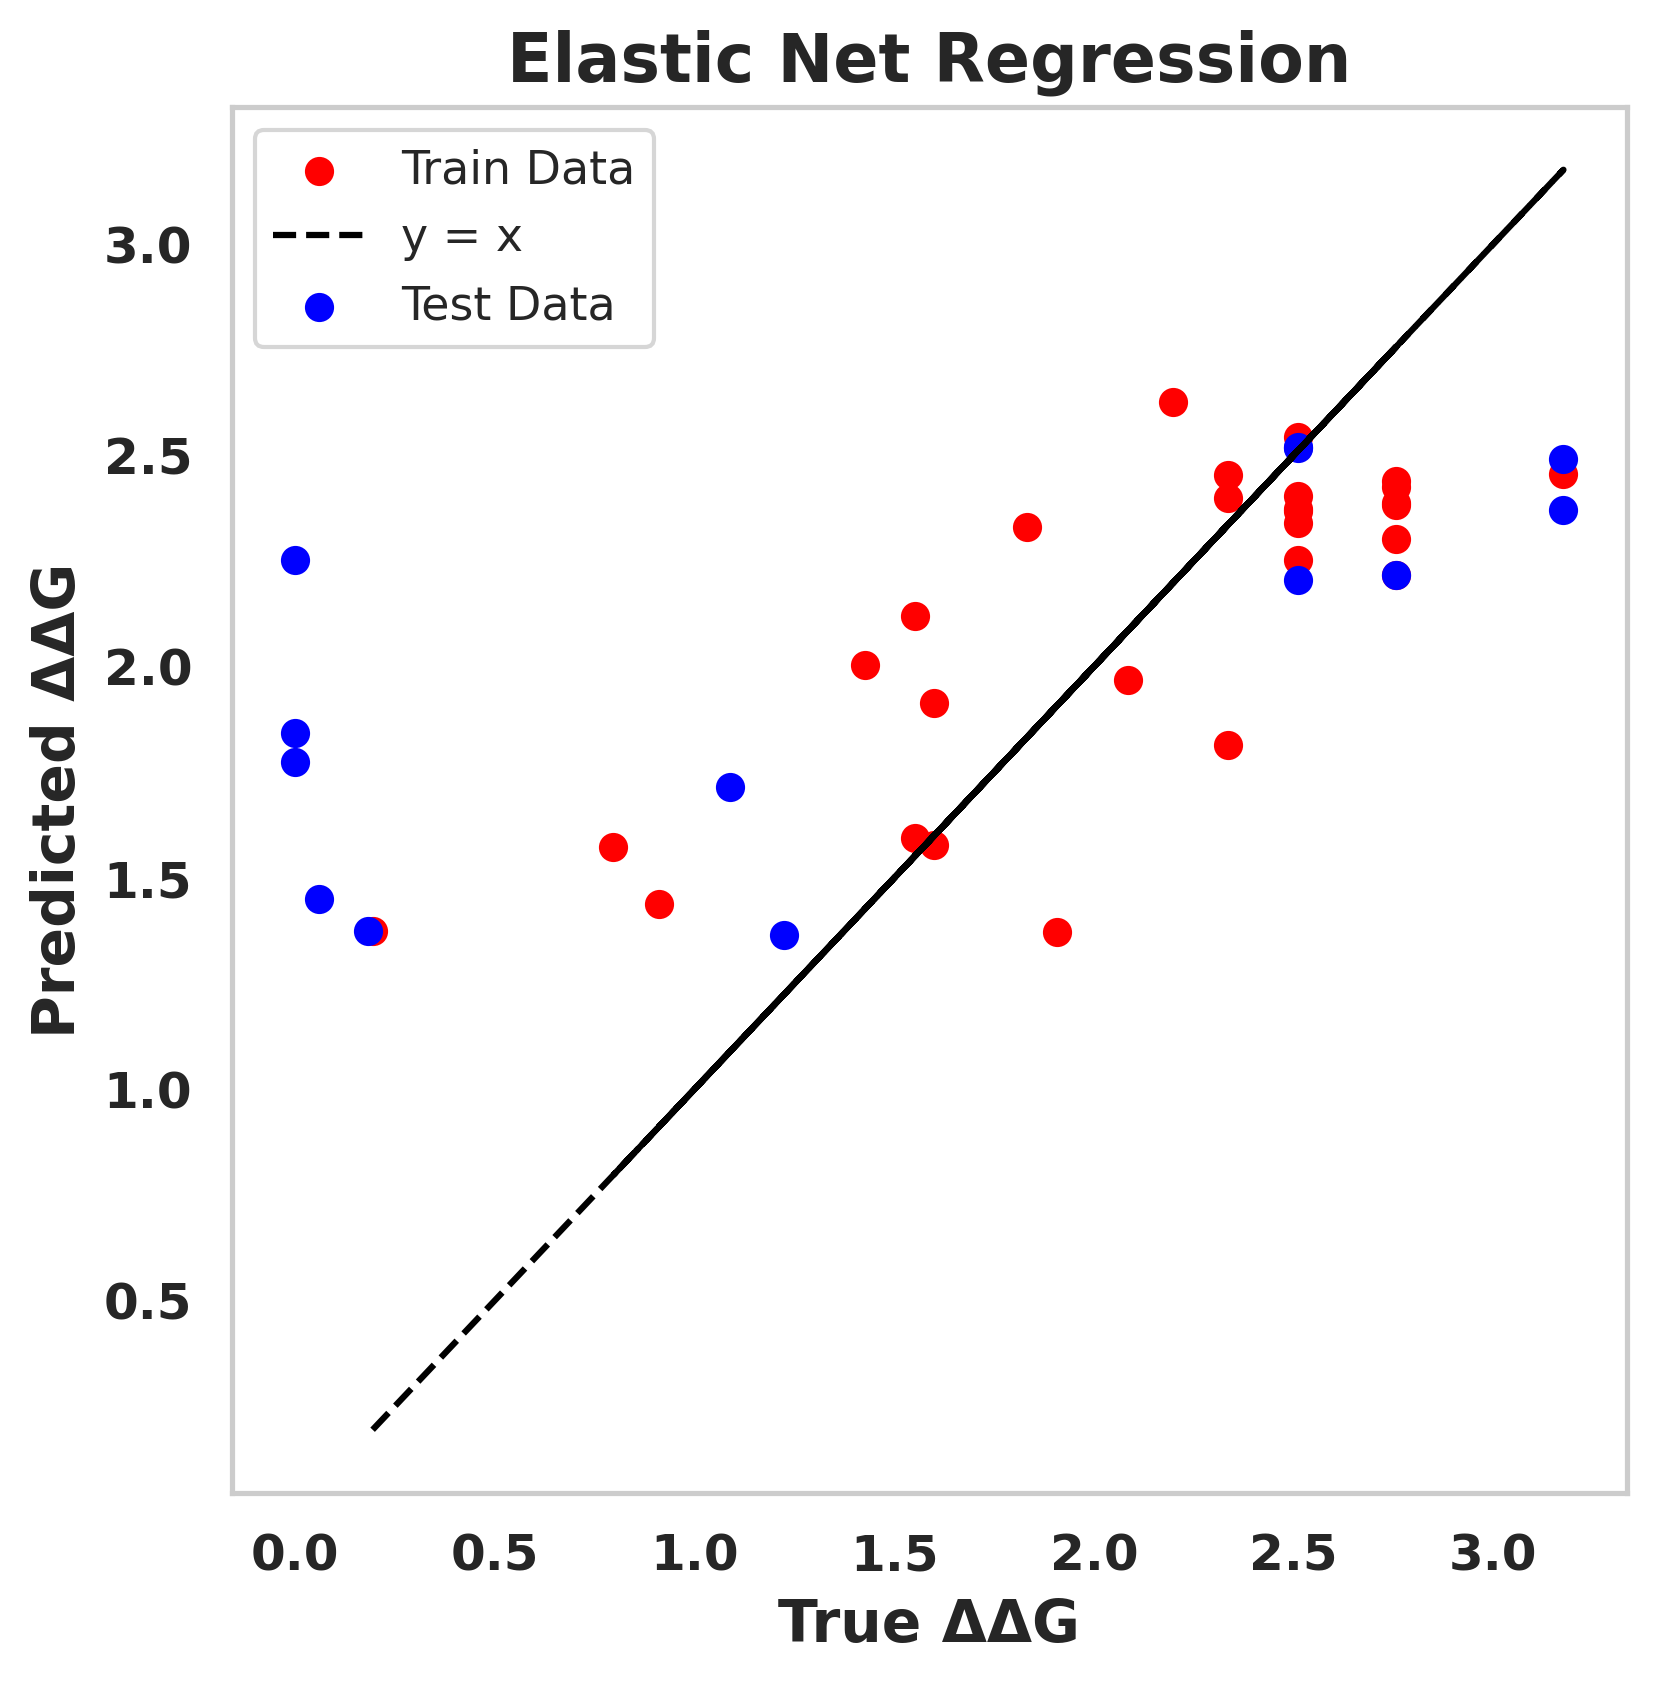

Best Test R2 Score: 0.8542931115314171
Best Model: RandomForestRegressor(criterion='friedman_mse', max_depth=3,
                      max_features='sqrt', n_estimators=250, random_state=28)


In [ ]:
models = [rfr, xgboost, dtr,svr, enr]
best_test_r2 = -np.inf
best_model = None

for model in models:
    model_result = model(X_norm, y)
    test_r2 = model_result[1]

    if best_test_r2 < test_r2:
        best_test_r2 = test_r2
        best_model = model_result[0]

print(f"Best Test R2 Score: {best_test_r2}")
print(f"Best Model: {best_model}")

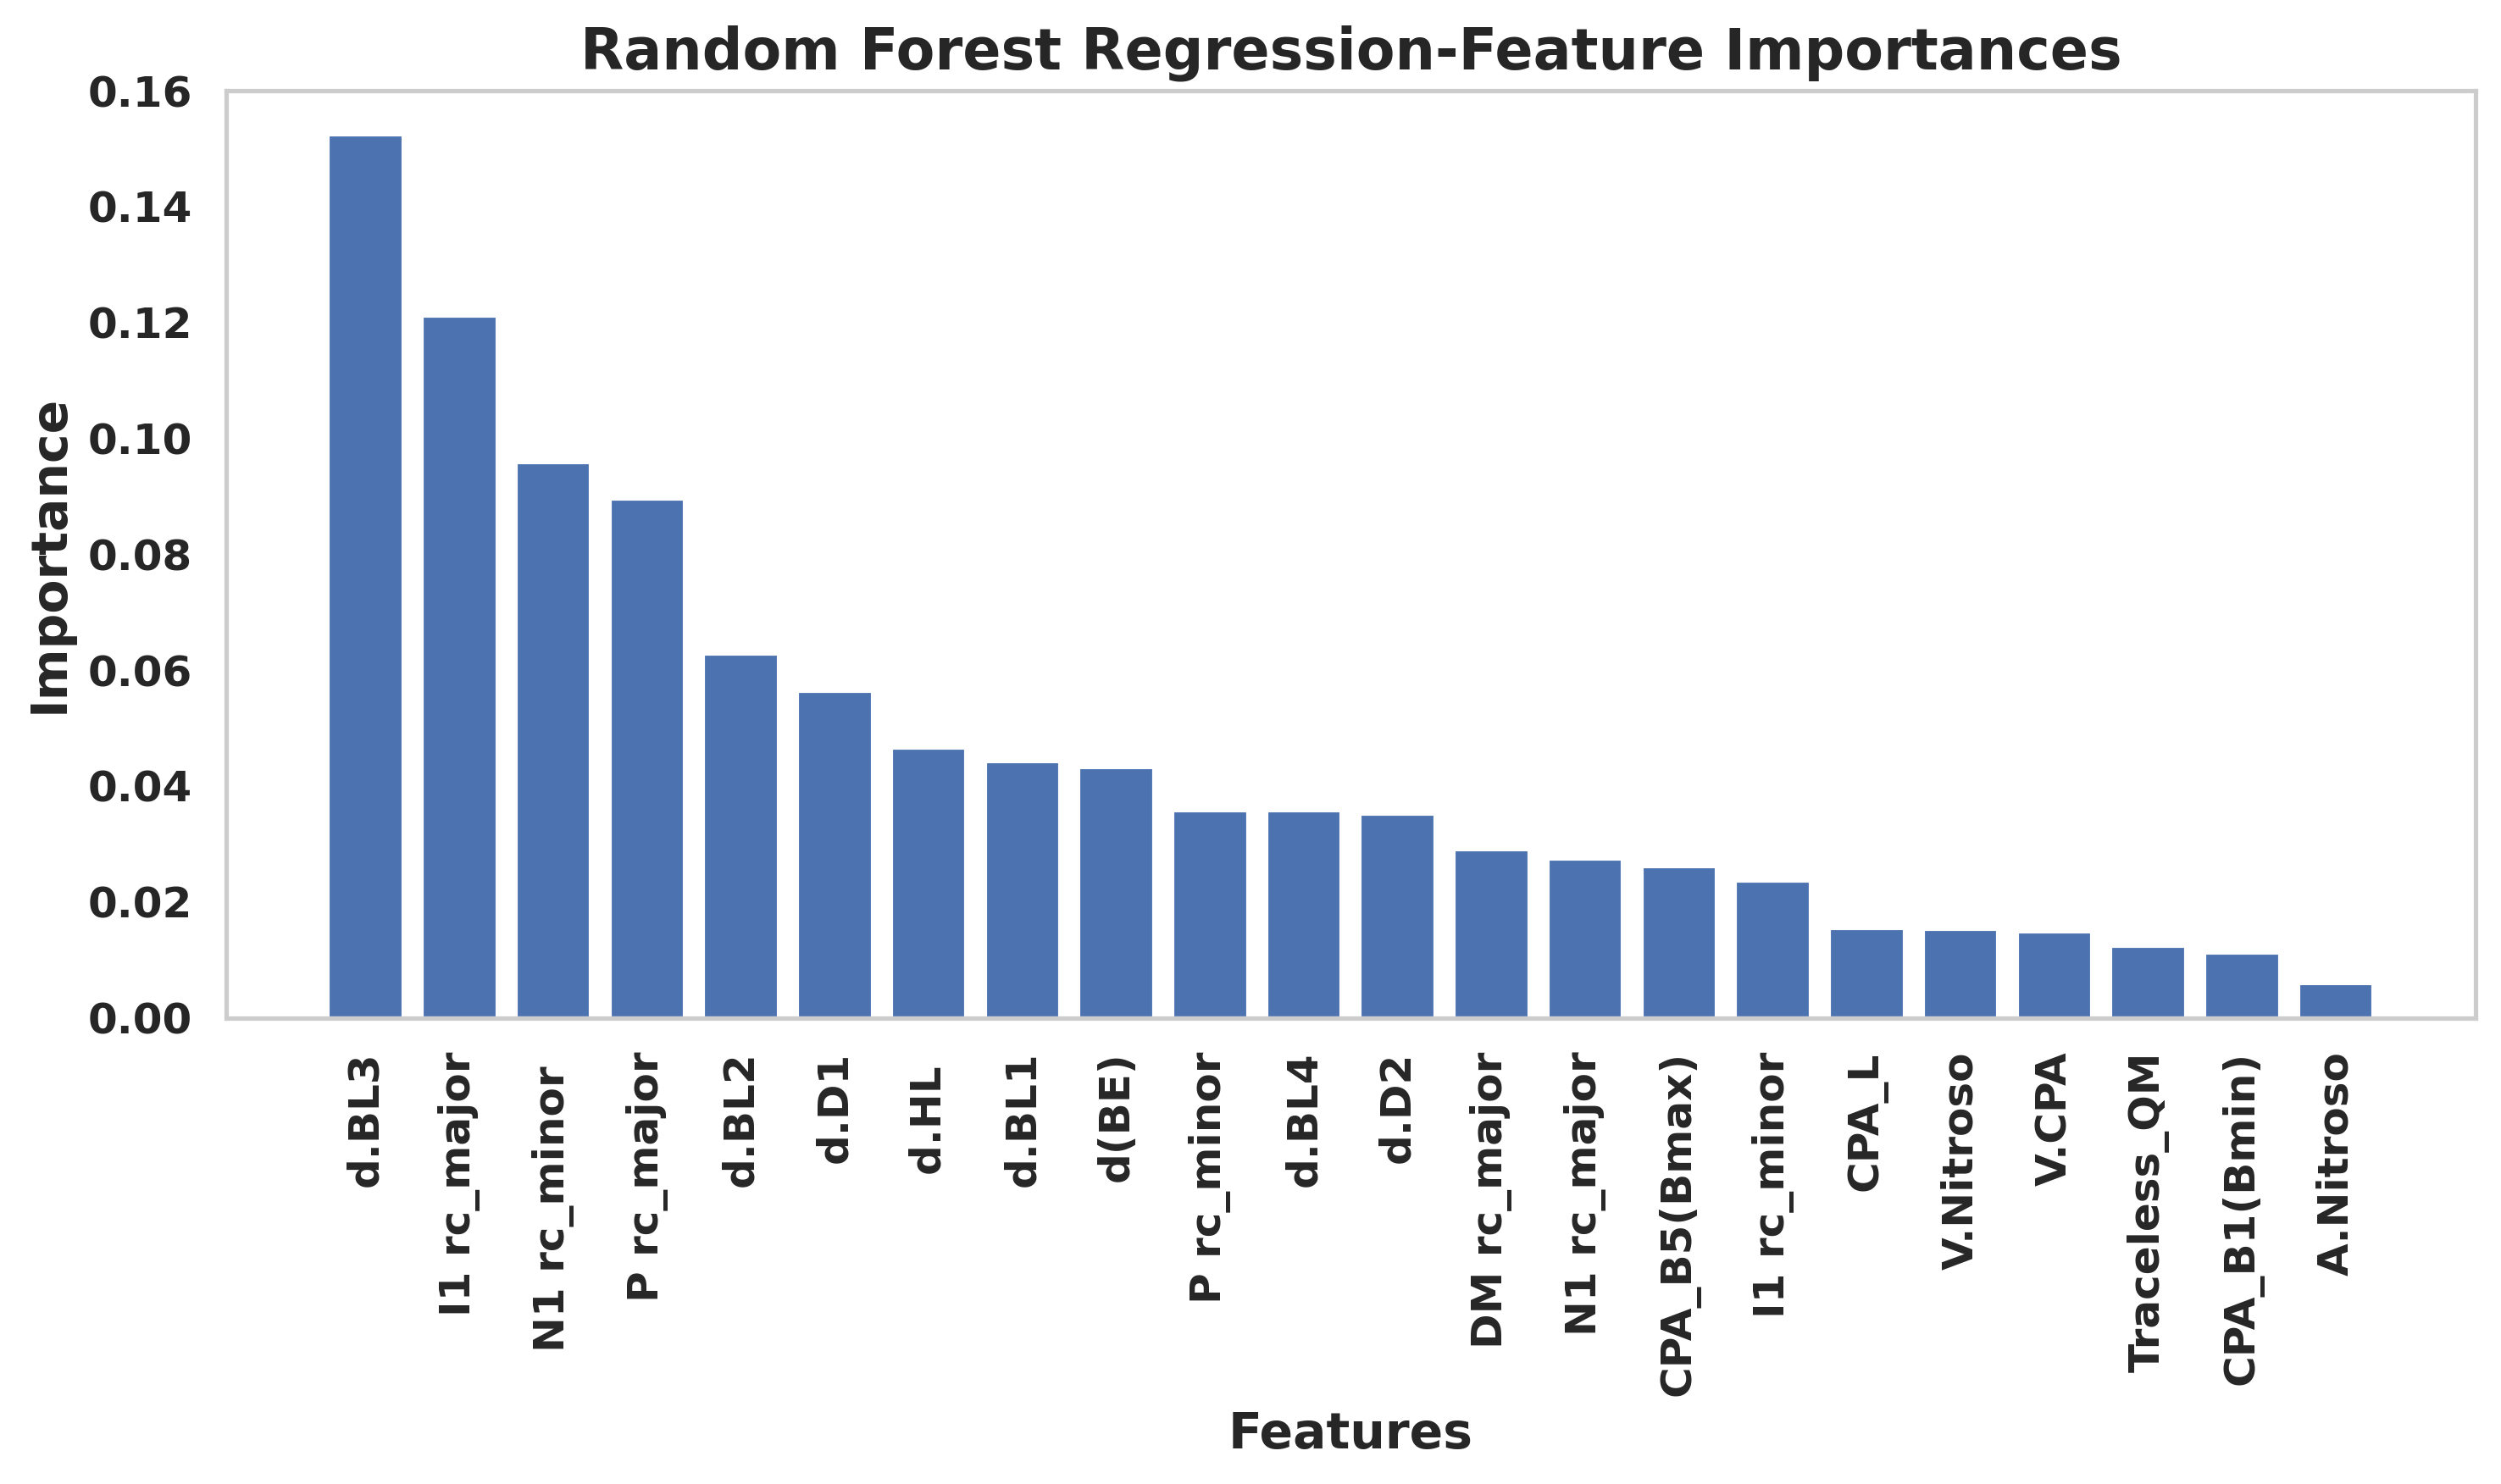

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=45)
best_model.fit(X_train, y_train)
importances = best_model.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]
plt.figure(figsize=(10, 6), dpi=300)
plt.bar(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90, fontsize=12, fontweight='bold')
plt.xlabel('Features', fontweight='bold', fontsize=14)
plt.ylabel('Importance', fontweight='bold', fontsize=14)
plt.title('Random Forest Regression-Feature Importances', fontweight='bold', fontsize=16)
plt.yticks(fontweight='bold', fontsize=12)
plt.gca().grid(False)
plt.tight_layout()
plt.show()

**External TestSet 1**

In [ ]:
ext_X_norm1= scaler.transform(ext_testset1)
ext_X_norm1 = pd.DataFrame(ext_X_norm1, columns=ext_testset1.columns)
ext_X_norm1.head()

,d.BL1,d.BL2,d.BL3,d.BL4,d.D1,d.D2,N1 rc_major,N1 rc_minor,I1 rc_major,I1 rc_minor,...,P rc_major,P rc_minor,CPA_B1(Bmin),CPA_B5(Bmax),CPA_L,d(BE),Traceless_QM,A.Nitroso,V.Nitroso,V.CPA
0,0.474215,0.261807,0.445153,0.645932,0.154085,0.404600,0.810811,0.357143,0.473684,0.431373,...,0.523118,0.513090,0.226415,0.039788,1.000000,0.999997,0.341947,0.0,0.0,0.524598
1,0.578208,0.631833,0.922393,0.781214,0.479064,0.631851,0.513514,0.285714,0.394737,0.529412,...,0.284237,0.296410,0.144654,0.315650,0.244186,0.999997,0.602519,0.0,0.0,0.365715
2,0.455673,0.593653,0.481107,0.688269,0.407120,0.800718,0.567568,0.214286,0.447368,0.627451,...,0.686995,0.676909,1.000000,0.639257,0.500000,0.999997,0.586951,0.0,0.0,1.000000
3,0.561358,0.308541,0.421885,0.786271,0.318928,0.412151,0.918919,0.928571,0.421053,0.215686,...,0.212410,0.217850,0.025157,0.000000,0.476744,0.999997,0.510762,0.0,0.0,0.214384
4,0.674509,0.185819,0.510074,0.722367,0.471332,0.336907,0.837838,0.535714,0.131579,0.235294,...,0.846745,0.836919,0.452830,1.000000,0.406977,0.999997,0.279619,0.0,0.0,0.998119


In [ ]:
y_pred_ext1= best_model.predict(ext_X_norm1)
y_pred_ext1

array([1.37913796, 1.40742695, 1.8341894 , 0.9803537 , 1.26198529,
       1.75298973, 1.91526619, 1.65745759, 1.09401358, 1.48447127,
       2.07137711, 0.95711563, 1.6588719 , 1.64548394, 1.01269036,
       1.00964721, 1.39268184, 0.9621669 , 2.00484701, 1.91830892,
       1.17171233, 1.4363996 , 1.56072364, 1.88857662, 1.03642728,
       1.45299806, 1.57369181, 1.68942338, 2.26077046, 1.10514725,
       2.0291934 , 1.02646647, 1.57932843, 2.33743865, 2.20960964,
       1.41411632, 2.07957734, 0.94662972, 1.48571505, 1.42594189,
       2.22889904, 1.67251966, 1.10322142, 1.67793826, 1.72279446,
       1.85016623, 1.26392432, 1.36723063, 1.93194644, 1.83765455,
       1.99383623, 2.02150527, 1.81259852, 1.67734514, 1.89708589,
       2.17506269, 0.95846037, 1.48319431, 1.90999369, 2.72136467,
       2.34674327, 1.70814655, 1.33993778, 1.59139058, 2.20925226,
       2.20133401, 1.00523191, 1.70793707, 1.80606557, 2.44692151,
       2.24023248, 1.7159461 , 1.56128151, 1.57686588, 1.84258

In [ ]:
ee_values = []
n=len(y_pred_ext1)

for i in range(0,n):
  ee= -1*100*(1-exp(y_pred_ext1[i]/0.6))/(1+exp(y_pred_ext1[i]/0.6))
  ee_values.append(ee)

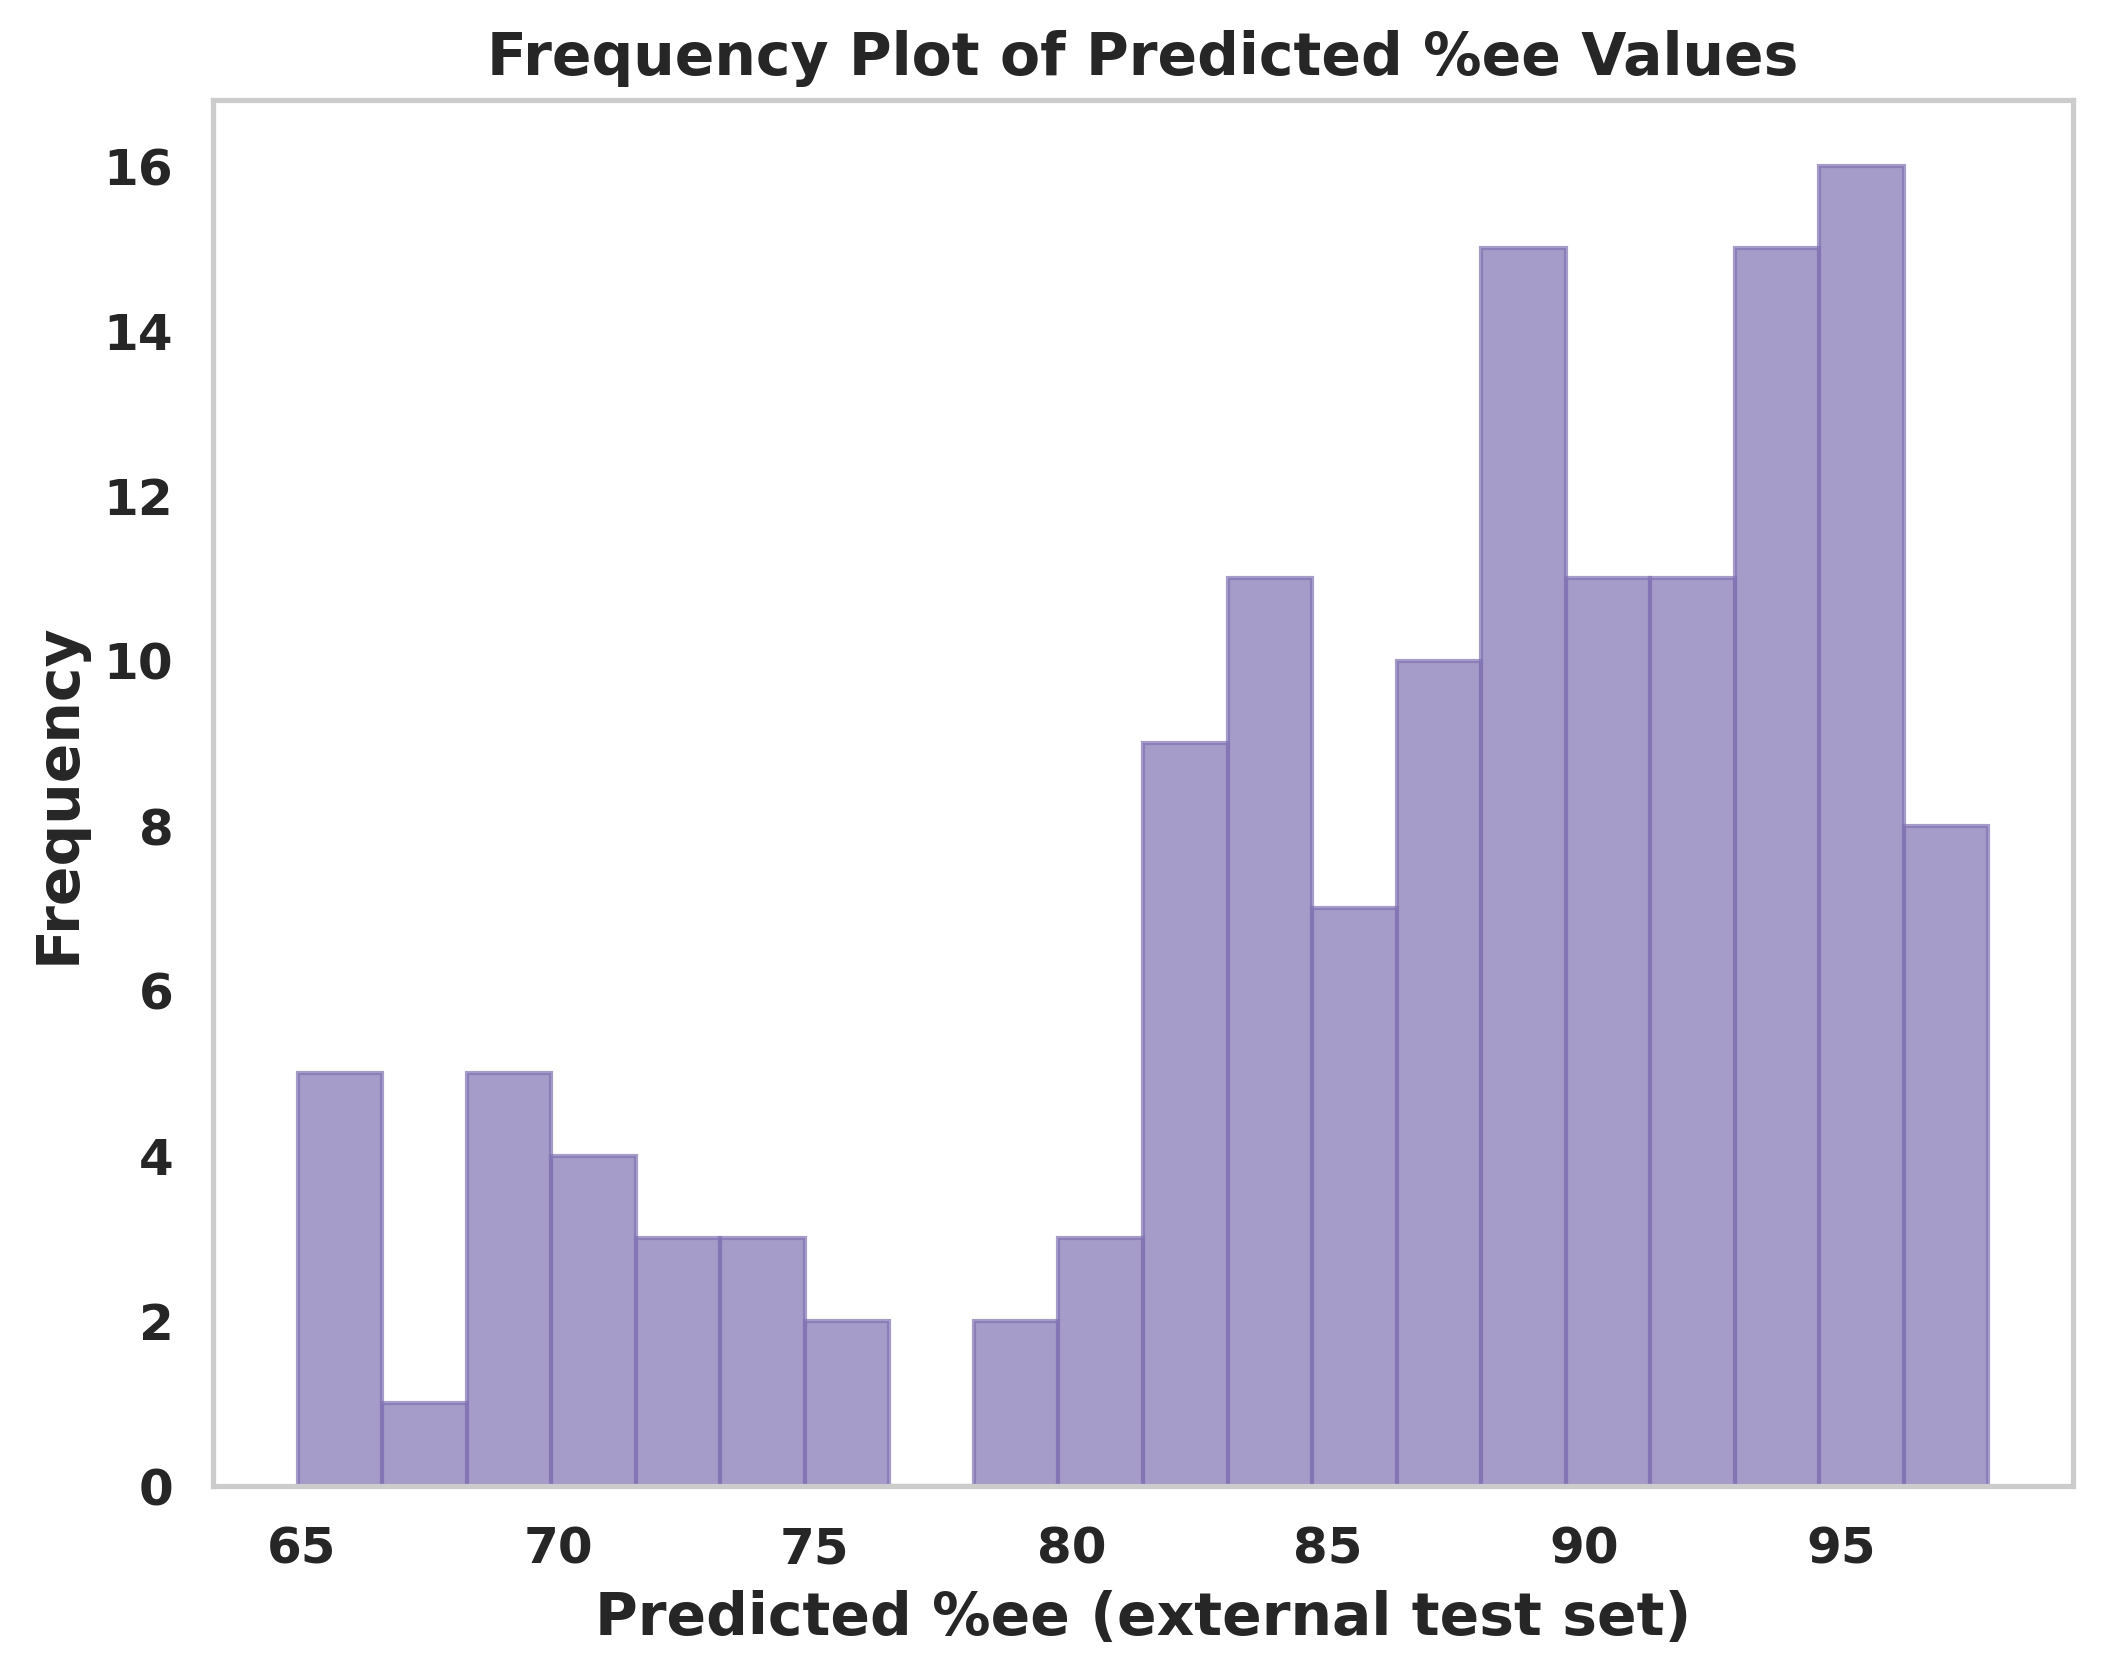

In [ ]:
plt.figure(figsize=(8, 6),dpi=300)
plt.hist(ee_values, bins=20, edgecolor='m', color='m', alpha=0.7)
plt.xlabel('Predicted %ee (external test set)',fontweight='bold', fontsize=14)
plt.ylabel('Frequency',fontweight='bold', fontsize=14)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('Frequency Plot of Predicted %ee Values',fontweight='bold', fontsize=14)
plt.gca().grid(False)
plt.show()

**External TestSet 2**

In [ ]:
ext_X_norm2= scaler.transform(ext_X2)
ext_X_norm2 = pd.DataFrame(ext_X_norm2, columns=ext_X2.columns)
ext_X_norm2

,d.BL1,d.BL2,d.BL3,d.BL4,d.D1,d.D2,N1 rc_major,N1 rc_minor,I1 rc_major,I1 rc_minor,...,P rc_major,P rc_minor,CPA_B1(Bmin),CPA_B5(Bmax),CPA_L,d(BE),Traceless_QM,A.Nitroso,V.Nitroso,V.CPA
0,0.510303,0.493368,0.428397,0.699268,0.494897,0.310816,0.891892,0.464286,0.473684,0.431373,...,0.000000,0.000000,0.0,0.307692,0.034884,0.999996,1.000000,0.0,0.0,0.000000
1,0.519203,0.374985,0.429754,0.672888,0.104589,0.404094,0.783784,0.392857,0.447368,0.392157,...,0.089171,0.106032,0.0,0.002653,0.000000,0.999997,0.551748,0.0,0.0,0.051204


In [ ]:
y_pred_ext2= best_model.predict(ext_X_norm2)

n=len(y_pred_ext2)
for i in range(0,n):
  ee= -1*100*(1-exp(y_pred_ext2[i]/0.6))/(1+exp(y_pred_ext2[i]/0.6))
  print("Predicted %ee (external testset-2):",ee)

Predicted %ee (external testset-2): 60.69954525466284
Predicted %ee (external testset-2): 80.73848413604158
